In [207]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import CRS

### Problem 1: Geocode shopping centers (5 points)

The overall aim of problems 1-3 is to find out **how many people live within a walking distance (1.5 km) from certain shopping centers in Helsinki**.

In problem 1 aim is to find out the addresses of shopping centers and to retreive numercal coordinates for these addresses. As an output, we will have a Shapefile called `shopping_centers.shp` which contains the geocoded result.

**Preparation:** Find out the addresses for following shopping centers from the internet, and write the addresses into a text file called `shopping_centers.txt`:

 - Itis
 - Forum
 - Iso-omena
 - Sello
 - Jumbo
 - REDI
 - Tripla 
 
 *Hint for "Tripla": This shopping center opened in October 10 2019, and if you are doing this exercise soon after that, the official address might not yet be in online databases. 
 Check for an address nearby the Pasila railway station on OpenStreetMap.org and use that as input.*

`shopping_centers.txt` should have semicolon (`;`) as a separator, and the file should include the following columns:

- ``id`` (integer) containing an unique identifier for each shopping center
- ``name`` (string) of each shopping center
- ``addr`` (string) the address 


See and example of how to format the text file [in the lesson 3 materials](https://automating-gis-processes.github.io/site/master/notebooks/L3/geocoding_in_geopandas.html). Save (and upload) the text file into your exercise repository.

- Read `shopping_centers.txt` that you just created into a pandas DataFrame called ``data``:

In [174]:
data = pd.read_csv('data/shopping_centers.txt', sep=';')

In [175]:
#NON-EDITABLE TEST CELL
# Check your input data
print(data)

          id         name                                            address
0    6188896         Itis  Itis shopping centre, Itäkatu, Itäkeskus, Vart...
1  289767497        Forum  Forum, Mannerheimintie, City center, Kluuvi, S...
2  280210331  Ison Omenan  Ison Omenan kirjasto, Suomenlahdentie, Nuottan...
3    7752187        Sello  Sello Shopping center, Linnatullinkatu, Etelä-...
4  626938281         REDI  Redi, Hermannin rantatie, Kalasatama, Sörnäine...
5  348149445        Jumbo  Mall of Tripla, Veturitie, Keski-Pasila, Pasil...


- Geocode the addresses using the Nominatim geocoding service. Store the output in a variable called `geo`:

In [176]:
# Geocode the addresses using Nominatim
geo = gpd.tools.geocode(data['address'], provider='nominatim', 
                        user_agent='autogis_xxx', timeout=4)

In [177]:
#NON-EDITABLE TEST CELL
# Check the geocoded output
print(geo)

                    geometry  \
0  POINT (25.08294 60.21170)   
1  POINT (24.93814 60.16927)   
2  POINT (24.73896 60.16010)   
3  POINT (24.81226 60.21832)   
4  POINT (24.98005 60.18708)   
5  POINT (24.93137 60.19866)   

                                             address  
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...  
1  Forum, Mannerheimintie, Keskusta, Kluuvi, Etel...  
2  Ison Omenan kirjasto, 1, Suomenlahdentie, Nuot...  
3  Kauppakeskus Sello, Linnatullinkatu, Etelä-Lep...  
4  Stadin Kebab, 5, Hermannin rantatie, Kalasatam...  
5  Mall of Tripla, 1, Veturitie, Keski-Pasila, Pa...  


In [178]:
#NON-EDITABLE TEST CELL
# Check the data type (should be a GeoDataFrame!)
print(type(geo))

<class 'geopandas.geodataframe.GeoDataFrame'>


Check that the coordinate reference system of the geocoded result is correctly defined, and **reproject the layer into ETRS GK-25** (EPSG:3879):

In [179]:
geo = geo.to_crs(epsg=3879)

In [180]:
#NON-EDITABLE TEST CELL
# Check layer crs
print(geo.crs)

epsg:3879


- Make a table join between the geocoded addresses (``geo``) and the original addresses (``data``) in order to link the numerical coordinates and  the `id` and `name` of each shopping center. 
- Store the output in a variable called ``geodata`` 


In [181]:
geo

,geometry,address
0,POINT (25504598.602 6677662.109),"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va..."
1,POINT (25496566.028 6672933.128),"Forum, Mannerheimintie, Keskusta, Kluuvi, Etel..."
2,POINT (25485504.300 6671938.465),"Ison Omenan kirjasto, 1, Suomenlahdentie, Nuot..."
3,POINT (25489593.436 6678411.568),"Kauppakeskus Sello, Linnatullinkatu, Etelä-Lep..."
4,POINT (25498893.192 6674916.094),"Stadin Kebab, 5, Hermannin rantatie, Kalasatam..."
5,POINT (25496193.557 6676208.169),"Mall of Tripla, 1, Veturitie, Keski-Pasila, Pa..."


In [182]:
data

,id,name,address
0,6188896,Itis,"Itis shopping centre, Itäkatu, Itäkeskus, Vart..."
1,289767497,Forum,"Forum, Mannerheimintie, City center, Kluuvi, S..."
2,280210331,Ison Omenan,"Ison Omenan kirjasto, Suomenlahdentie, Nuottan..."
3,7752187,Sello,"Sello Shopping center, Linnatullinkatu, Etelä-..."
4,626938281,REDI,"Redi, Hermannin rantatie, Kalasatama, Sörnäine..."
5,348149445,Jumbo,"Mall of Tripla, Veturitie, Keski-Pasila, Pasil..."


In [183]:
# Join the tables
geodata = geo.join(data.drop(columns='address'))

In [184]:
#NON-EDITABLE TEST CELL
# Check the join output
print(geodata.head())

                           geometry  \
0  POINT (25504598.602 6677662.109)   
1  POINT (25496566.028 6672933.128)   
2  POINT (25485504.300 6671938.465)   
3  POINT (25489593.436 6678411.568)   
4  POINT (25498893.192 6674916.094)   

                                             address         id         name  
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...    6188896         Itis  
1  Forum, Mannerheimintie, Keskusta, Kluuvi, Etel...  289767497        Forum  
2  Ison Omenan kirjasto, 1, Suomenlahdentie, Nuot...  280210331  Ison Omenan  
3  Kauppakeskus Sello, Linnatullinkatu, Etelä-Lep...    7752187        Sello  
4  Stadin Kebab, 5, Hermannin rantatie, Kalasatam...  626938281         REDI  


- Save the output as a Shapefile called `shopping_centers.shp` 

In [185]:
# Define output filepath
out_fp = 'data/shopping_centers.shp'

geodata.to_file(out_fp)

In [186]:
#NON-EDITABLE TEST CELL
# Print info about output file
print("Geocoded output is stored in this file:", out_fp)

Geocoded output is stored in this file: data/shopping_centers.shp


## Problem 2: Create buffers around shopping centers (5 points)

Let's continue with our case study and calculate a 1.5 km buffer around the geocoded points. 


- Start by creating a new column called `buffer` to ``geodata`` GeoDataFrame:

In [187]:
geodata['buffer'] = None

- Calculate a 1.5 km buffer for each geocoded point. Store the buffer geometry in the new `buffer` column.

Here, you can use the [GeoDataFrame buffer() method](http://geopandas.org/geometric_manipulations.html#GeoSeries.buffer), which uses Shapely's [buffer](http://toblerity.org/shapely/manual.html#object.buffer) in the bacground. You only need to use the `distance` -parameter, don't worry about the other parameters.

In [188]:
geodata['buffer'] = geodata.buffer(distance=1500)

In [192]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                           geometry  \
0  POINT (25504598.602 6677662.109)   
1  POINT (25496566.028 6672933.128)   
2  POINT (25485504.300 6671938.465)   
3  POINT (25489593.436 6678411.568)   
4  POINT (25498893.192 6674916.094)   

                                             address         id         name  \
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...    6188896         Itis   
1  Forum, Mannerheimintie, Keskusta, Kluuvi, Etel...  289767497        Forum   
2  Ison Omenan kirjasto, 1, Suomenlahdentie, Nuot...  280210331  Ison Omenan   
3  Kauppakeskus Sello, Linnatullinkatu, Etelä-Lep...    7752187        Sello   
4  Stadin Kebab, 5, Hermannin rantatie, Kalasatam...  626938281         REDI   

                                              buffer  
0  POLYGON ((25506098.602 6677662.109, 25506091.3...  
1  POLYGON ((25498066.028 6672933.128, 25498058.8...  
2  POLYGON ((25487004.300 6671938.465, 25486997.0...  
3  POLYGON ((25491093.436 6678411.568, 25491086.2...  
4  POLYGO

In [193]:
#NON-EDITABLE TEST CELL
# Check the data type of the first value in the buffer-column
print(type(geodata.at[0,'buffer']))

<class 'shapely.geometry.polygon.Polygon'>


In [194]:
#NON-EDITABLE TEST CELL
# Check the areas of your buffers in km^2
print(round(gpd.GeoSeries(geodata["buffer"]).area / 1000000))

0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
5    7.0
dtype: float64


- Replace the values in `geometry` column with the values of `buffer` column:

In [196]:
geodata['geometry'] = geodata['buffer']

In [197]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                                            geometry  \
0  POLYGON ((25506098.602 6677662.109, 25506091.3...   
1  POLYGON ((25498066.028 6672933.128, 25498058.8...   
2  POLYGON ((25487004.300 6671938.465, 25486997.0...   
3  POLYGON ((25491093.436 6678411.568, 25491086.2...   
4  POLYGON ((25500393.192 6674916.094, 25500385.9...   

                                             address         id         name  \
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...    6188896         Itis   
1  Forum, Mannerheimintie, Keskusta, Kluuvi, Etel...  289767497        Forum   
2  Ison Omenan kirjasto, 1, Suomenlahdentie, Nuot...  280210331  Ison Omenan   
3  Kauppakeskus Sello, Linnatullinkatu, Etelä-Lep...    7752187        Sello   
4  Stadin Kebab, 5, Hermannin rantatie, Kalasatam...  626938281         REDI   

                                              buffer  
0  POLYGON ((25506098.602 6677662.109, 25506091.3...  
1  POLYGON ((25498066.028 6672933.128, 25498058.8...  
2  POLYGON ((2548

Optional: at this point, you can drop out unnecessary columns from the geodataframe. In the next problem, 
we will only need these columns: `'id', 'name', 'geometry'`

In [198]:
geodata.drop(columns=['address', 'buffer'], inplace=True)

## Problem 3: How many people live near shopping centers? (5 points)

Last step in our analysis is to make a spatial join between our buffer layer and population data in order to find out **how many people live near each shopping center**. We will use the same data as we did during [lesson 3](https://automating-gis-processes.github.io/site/notebooks/L3/spatial-join.html#Spatial-join); **a Population Grid** that is available via the HSY wfs. 

Alternatively, you can also download the data from the [Helsinki Region Infoshare (HRI)](https://www.hsy.fi/fi/asiantuntijalle/avoindata/Sivut/AvoinData.aspx?dataID=7) as a shapefile (using wget).

The coordinate reference system of the population grid is **ETRS GK-25 (EPSG:3879)**.


**Steps:**

- Read the population grid into a geodataframe

- Select only the useful columns from the population grid: ``'asukkaita'`` (=population count per grid square) and ``'geometry'`` 

- Make a spatial join between your buffered point layer and population grid layer. Join the information now from buffer layer **into the population grid layer**

- Group the joined layer by shopping center index

- Calculate the sum of population living within 1.5 km for each shopping center.

**Finally:**

- Print out the population living within 1.5 km from each shopping center:

     - Itis
     - Forum
     - Iso-omena
     - Sello
     - Jumbo
     - REDI
     - Tripla
     
**Final print out should contain both the shopping center name and population count**, for example: `25858 people live within 1.5 km from Iso-Omena`.

*Feel free to divide your solution into several codeblocks! Remember to comment your code  :)*

In [200]:
# !wget -O 'data/Vaestotietoruudukko_2018_shp.zip' 'https://www.hsy.fi/sites/AvoinData/AvoinData/SYT/Tietoyhteistyoyksikko/Shape%20(Esri)/V%C3%A4est%C3%B6tietoruudukko/Vaestotietoruudukko_2018_shp.zip'
# !unzip 'data/Vaestotietoruudukko_2018_shp.zip' -d 'data/population'

--2020-03-27 11:35:31--  https://www.hsy.fi/sites/AvoinData/AvoinData/SYT/Tietoyhteistyoyksikko/Shape%20(Esri)/V%C3%A4est%C3%B6tietoruudukko/Vaestotietoruudukko_2018_shp.zip
Resolvendo www.hsy.fi (www.hsy.fi)... 193.64.12.7
Conectando-se a www.hsy.fi (www.hsy.fi)|193.64.12.7|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 256769 (251K) [application/x-zip-compressed]
Salvando em: “data/Vaestotietoruudukko_2018_shp.zip”

data/Vaestotietoruu 100%[===================>] 250,75K   200KB/s    em 1,3s    

2020-03-27 11:35:33 (200 KB/s) - “data/Vaestotietoruudukko_2018_shp.zip” salvo [256769/256769]

Archive:  data/Vaestotietoruudukko_2018_shp.zip
replace data/population/Vaestoruudukko_2018.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [201]:
geodata

,geometry,id,name
0,"POLYGON ((25506098.602 6677662.109, 25506091.3...",6188896,Itis
1,"POLYGON ((25498066.028 6672933.128, 25498058.8...",289767497,Forum
2,"POLYGON ((25487004.300 6671938.465, 25486997.0...",280210331,Ison Omenan
3,"POLYGON ((25491093.436 6678411.568, 25491086.2...",7752187,Sello
4,"POLYGON ((25500393.192 6674916.094, 25500385.9...",626938281,REDI
5,"POLYGON ((25497693.557 6676208.169, 25497686.3...",348149445,Jumbo


In [202]:
pop = gpd.read_file('data/population/Vaestoruudukko_2018.shp')
pop.crs

<Projected CRS: PROJCS["ETRS89_ETRS_GK25FIN_2010",GEOGCS["ETRS89", ...>
Name: ETRS89_ETRS_GK25FIN_2010
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: Geodetic_Reference_System_of_1980
- Prime Meridian: Greenwich

In [215]:
pop.crs = CRS(geodata.crs).to_wkt()

In [216]:
pop = pop.rename(columns={'ASUKKAITA': 'pop18'})
pop = pop[['pop18', 'geometry']]
pop.head()

,pop18,geometry
0,9,"POLYGON Z ((25472499.995 6689749.005 0.000, 25..."
1,5,"POLYGON Z ((25472499.995 6685998.998 0.000, 25..."
2,8,"POLYGON Z ((25472499.995 6684249.004 0.000, 25..."
3,5,"POLYGON Z ((25472499.995 6683999.005 0.000, 25..."
4,11,"POLYGON Z ((25472499.995 6682998.998 0.000, 25..."


In [217]:
geodata.crs == pop.crs

True

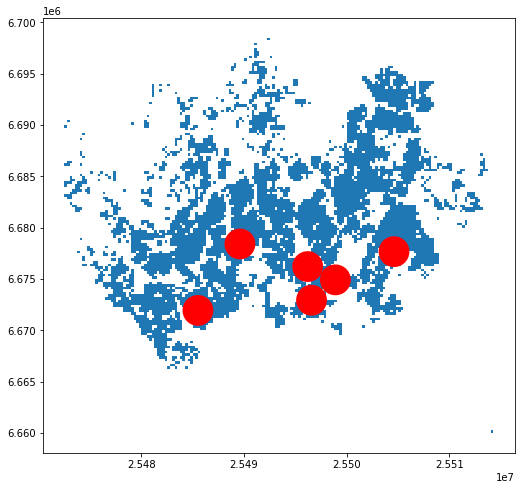

In [219]:
fig, ax = plt.subplots(figsize=(15,8))

# Plot population grid
pop.plot(ax=ax)

# Plot points
geodata.plot(ax=ax, color='red', markersize=15);

In [220]:
#NON-EDITABLE TEST CELL
# Check your input data
print("Number of rows:", len(pop))
print(pop.head(3))

Number of rows: 5832
   pop18                                           geometry
0      9  POLYGON Z ((25472499.995 6689749.005 0.000, 25...
1      5  POLYGON Z ((25472499.995 6685998.998 0.000, 25...
2      8  POLYGON Z ((25472499.995 6684249.004 0.000, 25...


In [226]:
# Create a spatial join between grid layer and buffer layer. 
join = gpd.sjoin(pop, geodata, op='intersects')

In [227]:
join

,pop18,geometry,index_right,id,name
1097,118,"POLYGON Z ((25483999.994 6672749.004 0.000, 25...",2,280210331,Ison Omenan
1098,178,"POLYGON Z ((25483999.994 6672499.005 0.000, 25...",2,280210331,Ison Omenan
1099,42,"POLYGON Z ((25483999.994 6672249.006 0.000, 25...",2,280210331,Ison Omenan
1152,124,"POLYGON Z ((25484250.000 6672999.003 0.000, 25...",2,280210331,Ison Omenan
1153,139,"POLYGON Z ((25484250.000 6672749.004 0.000, 25...",2,280210331,Ison Omenan
...,...,...,...,...,...
5339,369,"POLYGON Z ((25505749.995 6677748.997 0.000, 25...",0,6188896,Itis
5340,142,"POLYGON Z ((25505749.995 6677498.998 0.000, 25...",0,6188896,Itis
5341,192,"POLYGON Z ((25505749.995 6677248.998 0.000, 25...",0,6188896,Itis
5387,145,"POLYGON Z ((25505999.993 6677999.006 0.000, 25...",0,6188896,Itis


In [233]:
# Report how many people live within 1.5 km distance from each shopping center
join.groupby('name').agg({ 'pop18': 'sum' })

,pop18
name,
Forum,80969
Ison Omenan,32763
Itis,29199
Jumbo,41767
REDI,40081
Sello,28675


**Reflections:**
    
- How challenging did you find problems 1-3 (on scale to 1-5), and why?
- What was easy?
- What was difficult?

YOUR ANSWER HERE

Well done! Now you can continue to [problem 4](Exercise-3-Problem-4.ipynb)